# Data Preprocessing & Feature Engineering Tutorial

Welcome to this **guided demo and exercise** notebook. In this tutorial, we'll explore:

1. **Loading a small dataset** with missing values, outliers, and categorical columns.  
2. **Identifying** and **handling** missing data (e.g., dropping or imputing).  
3. **Detecting** outliers and applying a basic clipping strategy.  
4. **Encoding** categorical features.  
5. **Creating** new features from existing columns.

There is a sample CSV file named **`sample_data.csv`** in the same repo, representing a small user dataset with columns like:

- `user_id`: an identifier (might not be used in modeling)
- `age`: numeric, can contain missing values
- `income`: numeric, can have outliers
- `city`: categorical
- `purchases`: numeric (count of purchases)
- `score`: some numeric rating like credit score.

---

## 1. Imports & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Dataset

We'll define a short function to read the CSV into a DataFrame.

In [10]:
DATA_PATH = "./datasets/week-2_sample_data.csv" 

def load_data():
    """
    Reads a CSV, returns the DataFrame.
    Columns: ['user_id','age','income','city','purchases','score']
    """
    df = pd.read_csv(DATA_PATH)
    return df

# Demo
if __name__ == "__main__":
    df_raw = load_data()
    display(df_raw.head(10))
    print(df_raw.info())

,user_id,age,income,city,purchases,score
0,0,25,30000,New York,2.0,88
1,1,NaN,700000,Paris,4.0,95
2,2,44,120000,Tokyo,6.0,40
3,3,70,250000,NaN,3.0,77
4,4,32,18000,Berlin,1.0,52
5,5,20,-100,New York,2.0,60
6,6,55,999999,Paris,10.0,100
7,7,40,40000,Unknown,0.0,39
8,8,30,30000,Tokyo,5.0,missing
9,9,NaN,80000,Berlin,8.0,85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    15 non-null     int64  
 1   age        13 non-null     object 
 2   income     15 non-null     int64  
 3   city       14 non-null     object 
 4   purchases  14 non-null     float64
 5   score      15 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 852.0+ bytes
None


## 3. Handling Missing Data

### 3.1 Identify Missing Values

Check how many `NaN` or `None` entries each column has, and see if there's a strategy (drop vs. fill).

**Practice**:  
1. Print `df.isna().sum()` to see missing counts.  
2. Decide how to handle missing `age` or other columns.

*(No right/wrong approach, but let’s do something simple for demonstration.)*

In [3]:
def handle_missing(df):
    """
    Example function that:
    1. Fills or drops missing values
    2. Demonstrates a simple approach for missing 'age'
    """
    # TODO: fill in your approach
    # e.g. fill 'age' with median:
    median_age = df['age'].median()
    df['age'].fillna(median_age, inplace=True)
    
    # If 'city' is missing, maybe fill with 'Unknown':
    df['city'].fillna('Unknown', inplace=True)
    
    return df

if __name__ == "__main__":
    df_demo = load_data()
    print("Before handling missing values:")
    print(df_demo.isna().sum())
    
    df_demo = handle_missing(df_demo)
    print("\nAfter handling missing values:")
    print(df_demo.isna().sum())


Before handling missing values:
user_id      0
age          2
income       0
city         1
purchases    1
score        0
dtype: int64


TypeError: Cannot convert ['25' nan '44' '70' '32' '20' '55' '40' '30' nan '66' 'na' '42' '27' '62'] to numeric

## Don't panic!
The error above is expected and part of the learning process. If you look at the error message, it says that it cannot convert values in 'age' to a numeric type. This is because the missing values represented as 'nan'/'na' are present. This is common in the real world. To handle this, we can do the following.

In [4]:
def handle_missing(df):
    """
    Example function that:
    1. Fills or drops missing values
    2. Demonstrates a simple approach for missing 'age'
    """
    # Convert 'age' to numeric, forcing invalid strings to NaN
    df['age'] = pd.to_numeric(df_demo['age'], errors='coerce')

    # Explanation:
    #   - This will turn '12' -> 12, 'na' -> NaN, '' -> NaN, etc.
    #   - The column becomes float64 or int64 if no decimals.

    # e.g. fill 'age' with median:
    median_age = df['age'].median()
    df['age'].fillna(median_age, inplace=True)
    
    # If 'city' is missing, maybe fill with 'Unknown':
    df['city'].fillna('Unknown', inplace=True)
    
    return df

df_demo = handle_missing(df_demo)
print("\nAfter handling missing values:")
print(df_demo.isna().sum())


After handling missing values:
user_id      0
age          0
income       0
city         0
purchases    1
score        0
dtype: int64


/tmp/ipykernel_421439/548047595.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)
/tmp/ipykernel_421439/548047595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


## 4. Detecting & Handling Outliers

We’ll assume `income` might have outliers. We can do:

1. Plot a histogram or boxplot to see distribution.  
2. Decide on a cap or method (e.g., clip at 95th percentile).

**Practice**:  
- Use `df['income'].describe()` or a boxplot.  
- Clip incomes above e.g. 100000 to exactly 100000, if that’s your chosen approach.


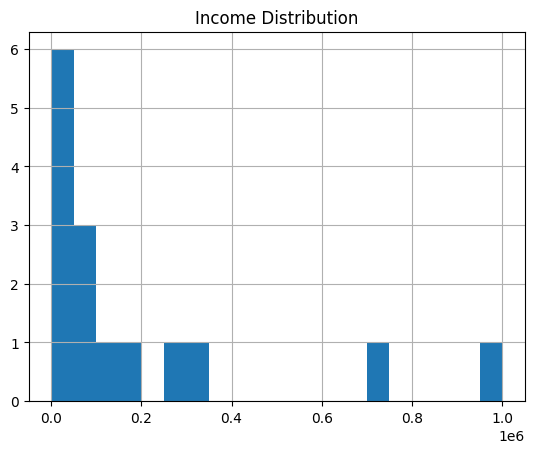

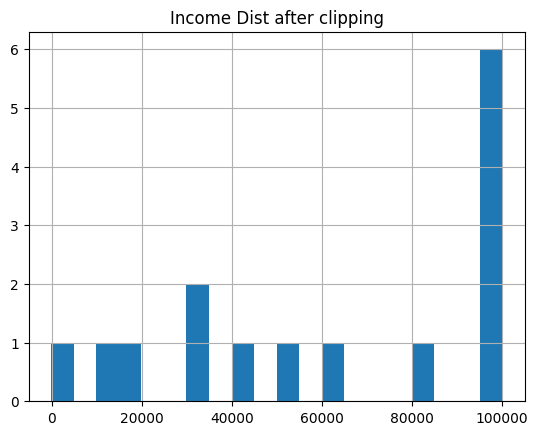

In [5]:
def clip_outliers(df, col='income', cap=100000):
    """
    Example function that clips 'income' at a certain cap.
    """
    # TODO: implement your outlier strategy
    df[col] = np.where(df[col] > cap, cap, df[col])
    return df

if __name__ == "__main__":
    df_demo = load_data()
    # A quick distribution check
    df_demo['income'].hist(bins=20)
    plt.title("Income Distribution")
    plt.show()
    
    # clip approach
    df_demo = clip_outliers(df_demo, col='income', cap=100000)
    # see result
    df_demo['income'].hist(bins=20)
    plt.title("Income Dist after clipping")
    plt.show()



## 5. Encoding Categorical Features

- **Label Encoding** or **One-Hot**: `pd.get_dummies()`.
- If `df['city']` is something like `[New York, Paris, Tokyo]`, we can do: `df = pd.get_dummies(df, columns=['city'])`.

**Practice**:  
- Create a function that one-hot encodes `city`.  
- Or do label encoding if you prefer.


In [6]:
def encode_city(df):
    """
    Example: one-hot encode 'city'
    This might create columns city_New York, city_Paris, city_Tokyo, etc.
    """
    # TODO: e.g.: df = pd.get_dummies(df, columns=['city'], drop_first=False)
    df = pd.get_dummies(df, columns=['city'], drop_first=False)
    return df

if __name__ == "__main__":
    df_demo = load_data()
    df_demo = encode_city(df_demo)
    display(df_demo.head())

,user_id,age,income,purchases,score,city_Berlin,city_New York,city_Paris,city_Tokyo,city_Unknown
0,0,25,30000,2.0,88,False,True,False,False,False
1,1,NaN,700000,4.0,95,False,False,True,False,False
2,2,44,120000,6.0,40,False,False,False,True,False
3,3,70,250000,3.0,77,False,False,False,False,False
4,4,32,18000,1.0,52,True,False,False,False,False



## 6. Creating New Features

Examples:
- **`df['family_size'] = df['SibSp'] + df['Parch'] + 1`** (like Titanic).  
- **`df['purchases_per_income'] = df['purchases'] / df['income']`** (user spending rate).
- **`df['log_score'] = np.log1p(df['score'])`** if `score` is large or skewed.

**Practice**:  
- Add a new feature based on existing columns. 
- Inspect correlation or distribution.


In [7]:
def create_features(df):
    """
    Example: create 'purchases_per_income'
    """
    # TODO: df['purchases_per_income'] = df['purchases'] / (df['income'] + 1)
    df['purchases_per_income'] = df['purchases'] / (df['income'] + 1)
    return df

if __name__ == "__main__":
    df_demo = load_data()
    df_demo = create_features(df_demo)
    display(df_demo.head(10))

,user_id,age,income,city,purchases,score,purchases_per_income
0,0,25,30000,New York,2.0,88,0.000067
1,1,NaN,700000,Paris,4.0,95,0.000006
2,2,44,120000,Tokyo,6.0,40,0.000050
3,3,70,250000,NaN,3.0,77,0.000012
4,4,32,18000,Berlin,1.0,52,0.000056
5,5,20,-100,New York,2.0,60,-0.020202
6,6,55,999999,Paris,10.0,100,0.000010
7,7,40,40000,Unknown,0.0,39,0.000000
8,8,30,30000,Tokyo,5.0,missing,0.000167
9,9,NaN,80000,Berlin,8.0,85,0.000100



## 7. Putting It All Together: A Pipeline

We can define a single function that:

1. **Loads** data
2. **Handles** missing
3. **Clips** outliers
4. **Encodes** categories
5. **Creates** new features
6. Returns the final cleaned DataFrame

Use the sub-steps from above. 


In [8]:
def preprocess_data():
    df = load_data()
    df = handle_missing(df)
    df = clip_outliers(df, col='income', cap=100000)
    df = encode_city(df)
    df = create_features(df)
    return df

if __name__ == "__main__":
    final_df = preprocess_data()
    display(final_df.head())
    print(final_df.info())

/tmp/ipykernel_421439/548047595.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)
/tmp/ipykernel_421439/548047595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,user_id,age,income,purchases,score,city_Berlin,city_New York,city_Paris,city_Tokyo,city_Unknown,purchases_per_income
0,0,25.0,30000,2.0,88,False,True,False,False,False,0.000067
1,1,41.0,100000,4.0,95,False,False,True,False,False,0.000040
2,2,44.0,100000,6.0,40,False,False,False,True,False,0.000060
3,3,70.0,100000,3.0,77,False,False,False,False,True,0.000030
4,4,32.0,18000,1.0,52,True,False,False,False,False,0.000056


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               15 non-null     int64  
 1   age                   15 non-null     float64
 2   income                15 non-null     int64  
 3   purchases             14 non-null     float64
 4   score                 15 non-null     object 
 5   city_Berlin           15 non-null     bool   
 6   city_New York         15 non-null     bool   
 7   city_Paris            15 non-null     bool   
 8   city_Tokyo            15 non-null     bool   
 9   city_Unknown          15 non-null     bool   
 10  purchases_per_income  14 non-null     float64
dtypes: bool(5), float64(3), int64(2), object(1)
memory usage: 927.0+ bytes
None


## 8. Next Steps

- **Scale** numeric columns (e.g., StandardScaler) if training a model.  
- **Split** train/test, confirm if new features help.  
- Possibly store the cleaned data: `final_df.to_csv("cleaned_data.csv", index=False)` if you want a final artifact.

**End of Tutorial**  
Feel free to experiment with your own transformations and methods!